# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country= []
date = []

counter = 0
of_set = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key 
print(f"Beginning Data Retrival")
print(f"-----------------------------")

for city in cities:
    query_url = url + "&q=" +city
    response = requests.get(query_url).json()
   
    
   
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if counter > 49:
            counter = 1
            of_sets += 1
            results = response["name"]
        
        else:
            counter += 1
            results = response["name"]
        
        print(f"Processing Record {counter} of Set {of_set} | {results}")
        
        time.sleep(1)
    
    except:
        print(f"City not found. Skipping...")
    continue 
    
        
    print(f"------------------------")
    print(f"Data Retrival Complete")
    print(f"------------------------")
    

Beginning Data Retrival
-----------------------------
Processing Record 1 of Set 1 | Pangnirtung
Processing Record 2 of Set 1 | Santa Fe
Processing Record 3 of Set 1 | Sitka
Processing Record 4 of Set 1 | Qaanaaq
Processing Record 5 of Set 1 | Iquitos
City not found. Skipping...
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Lufilufi
Processing Record 8 of Set 1 | Rikitea
City not found. Skipping...
Processing Record 9 of Set 1 | Aginskoye
City not found. Skipping...
Processing Record 10 of Set 1 | Koygorodok
Processing Record 11 of Set 1 | Husavik
Processing Record 12 of Set 1 | Cayenne
Processing Record 13 of Set 1 | Bluff
Processing Record 14 of Set 1 | Ushuaia
Processing Record 15 of Set 1 | Katsuura
Processing Record 16 of Set 1 | Rudnogorsk
Processing Record 17 of Set 1 | Khatanga
Processing Record 18 of Set 1 | Cidreira
Processing Record 19 of Set 1 | Port Alfred
Processing Record 20 of Set 1 | Cape Town
Processing Record 21 of Set 1 | Genhe
Processing R

City not found. Skipping...
Processing Record 40 of Set 1 | Barrow
Processing Record 41 of Set 1 | Sola
Processing Record 42 of Set 1 | Sarāhan
Processing Record 43 of Set 1 | Kavieng
Processing Record 44 of Set 1 | Kisangani
Processing Record 45 of Set 1 | Nikki
Processing Record 46 of Set 1 | Padang
Processing Record 47 of Set 1 | North Bend
Processing Record 48 of Set 1 | Geraldton
City not found. Skipping...
Processing Record 49 of Set 1 | Sakakah
Processing Record 50 of Set 1 | Ilulissat
City not found. Skipping...
Processing Record 2 of Set 1 | Alyangula
Processing Record 3 of Set 1 | Shingū
Processing Record 4 of Set 1 | Erzurum Province
Processing Record 5 of Set 1 | Aitape
Processing Record 6 of Set 1 | Faya
Processing Record 7 of Set 1 | Milas
Processing Record 8 of Set 1 | Leningradskiy
Processing Record 9 of Set 1 | Saldanha
Processing Record 10 of Set 1 | West Wendover
Processing Record 11 of Set 1 | Mokobeng
Processing Record 12 of Set 1 | Esperance
Processing Record 13 o

Processing Record 30 of Set 1 | Amarante do Maranhão
Processing Record 31 of Set 1 | Petropavlovsk-Kamchatskiy
Processing Record 32 of Set 1 | Kanturk
Processing Record 33 of Set 1 | Agadez
Processing Record 34 of Set 1 | Wajima
Processing Record 35 of Set 1 | Pathein
Processing Record 36 of Set 1 | Alice Springs
City not found. Skipping...
Processing Record 37 of Set 1 | Brza Palanka
Processing Record 38 of Set 1 | Honiara
Processing Record 39 of Set 1 | Oakham
Processing Record 40 of Set 1 | Kovdor
Processing Record 41 of Set 1 | ‘Ewa Beach
Processing Record 42 of Set 1 | Karratha
Processing Record 43 of Set 1 | Clyde River
Processing Record 44 of Set 1 | Kudahuvadhoo
Processing Record 45 of Set 1 | Westport
Processing Record 46 of Set 1 | Rameswaram
Processing Record 47 of Set 1 | Tambun
Processing Record 48 of Set 1 | Pisco
Processing Record 49 of Set 1 | Acapulco de Juárez
Processing Record 50 of Set 1 | Sergeevka
City not found. Skipping...
Processing Record 2 of Set 1 | Christch

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
raw_df = pd.DataFrame({"City":city_name, "Lat":lat, "Lng":lng,
                        "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed, "Country":country, "Date":date})

raw_df.head()

raw_df.to_csv('output/raw_df.csv')

In [12]:
raw_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.264093,21.546548,14.663594,73.065836,59.640569,3.657224,1.603652e+09
std,33.907795,92.512016,12.323835,20.534418,39.367354,2.770693,2.348250e+02
min,-54.800000,-179.170000,-18.570000,8.000000,0.000000,0.090000,1.603652e+09
25%,-7.255000,-59.620000,5.140000,64.000000,20.000000,1.682500,1.603652e+09
50%,24.635000,25.035000,17.000000,77.000000,75.000000,2.985000,1.603652e+09
75%,50.282500,106.775000,24.822500,89.000000,100.000000,5.075000,1.603652e+09
max,78.220000,179.320000,42.150000,100.000000,100.000000,18.000000,1.603653e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
humidity_over_100 = pd.read_csv('output/raw_df.csv')
humidity_over_100.head()
humidity_over_100 = humidity_over_100.loc[humidity_over_100['Humidity']>100]
humidity_over_100.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with humidity over 100

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Skip this step

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [31]:
#Create the date for analysis
date_time = time.strptime("10/20/20", "%m/%d/%y")
time_value = time.mktime(date_time)
#print(time_value)

display_date = time.gmtime(raw_df['Date'][0])
#print(time.strftime("%m/%d/%Y %H:%M:%S", display_date))

date_time = time.strftime("%x",display_date)
print(date_time)


10/25/20


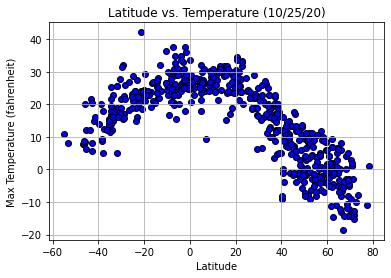

<Figure size 432x288 with 0 Axes>

In [33]:
plt.title(f"Latitude vs. Temperature ({date_time})")
x_axis = raw_df["Lat"]
y_axis = raw_df["Max Temp"]
plt.scatter(x_axis,y_axis, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (fahrenheit)")
plt.grid(True)
plt.show()

plt.savefig("output/lat_vs_temp.png")


## Latitude vs. Humidity Plot

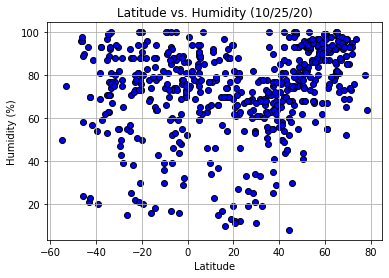

<Figure size 432x288 with 0 Axes>

In [35]:
plt.title(f"Latitude vs. Humidity ({date_time})")
x_axis = raw_df["Lat"]
y_axis = raw_df["Humidity"]
plt.scatter(x_axis,y_axis, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

plt.savefig("output/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

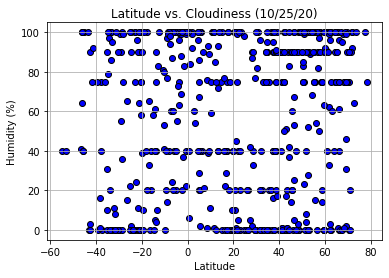

In [36]:
plt.title(f"Latitude vs. Cloudiness ({date_time})")
x_axis = raw_df["Lat"]
y_axis = raw_df["Cloudiness"]
plt.scatter(x_axis,y_axis, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

plt.savefig("output/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

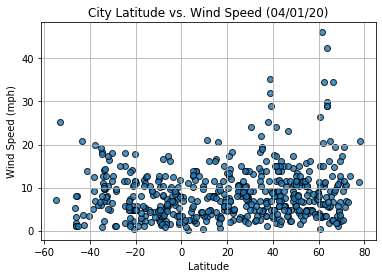

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


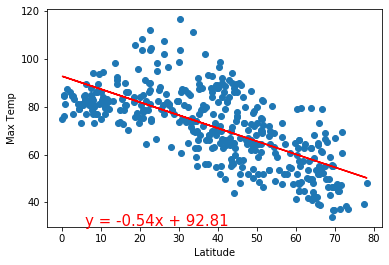

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


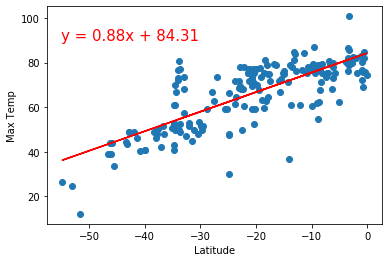

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


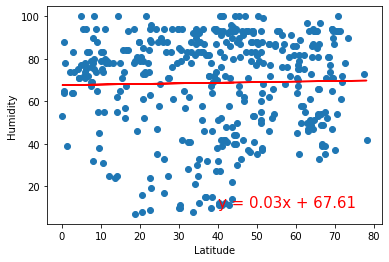

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


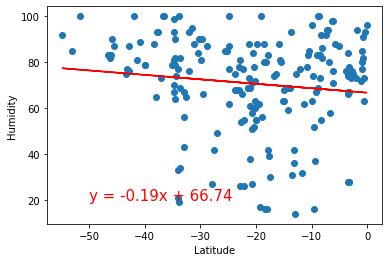

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


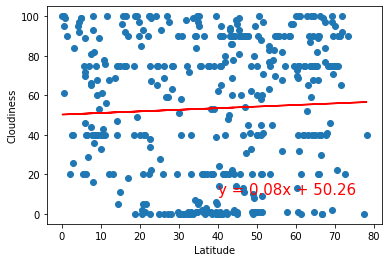

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


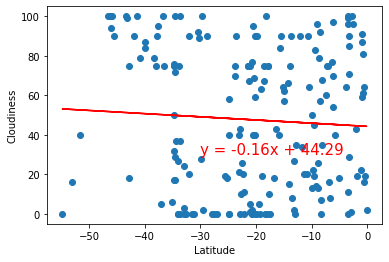

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


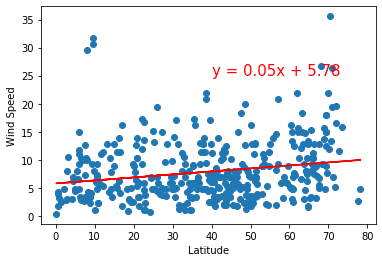

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


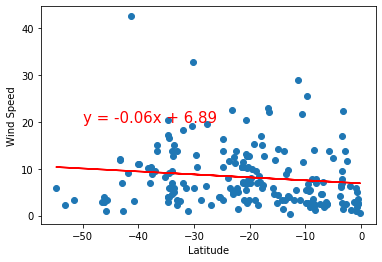